## Observations and Insights 

1) The breakdown of gender for the mice is nearly even, which means there is room to explore and discern if differences in gender could correlate with effectiveness of the treatment.

2) A strong correlation exists between mouse weight and tumor size; the larger the mouse, the larger the tumor.

3) Capomulin may be an effective treatment, as its performance with an example mouse shows a decrease of approximately 50% in tumor volume over a period of 45 days.

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = r"C:\Users\camer\Desktop\Pymaceuticals\Homework_05-Matplotlib_Instructions_Pymaceuticals_data_Mouse_metadata.csv"
study_results_path = r"C:\Users\camer\Desktop\Pymaceuticals\Homework_05-Matplotlib_Instructions_Pymaceuticals_data_Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combo_data = pd.merge(mouse_metadata, study_results, on ='Mouse ID')

combo_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [48]:
# Checking the number of mice in the DataFrame.
combo_data['Mouse ID'].value_counts()


g989    13
i635    10
y769    10
y163    10
k382    10
        ..
d133     1
b447     1
x226     1
f932     1
l872     1
Name: Mouse ID, Length: 249, dtype: int64

In [49]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
combo_data = combo_data.set_index('Mouse ID')
mouse = combo_data.loc['g989', :]

mouse.head()


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0


In [51]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = combo_data.drop(index = "g989")
clean_mice_df = clean_mice_df.reset_index()

clean_mice_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [52]:
# Checking the number of mice in the clean DataFrame.
clean_mice_df['Mouse ID'].value_counts()


i635    10
a644    10
b128    10
n304    10
r604    10
        ..
l872     1
f932     1
n482     1
b447     1
h428     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [109]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.
# Mean of tumor volume
# Median of tumor volume
# Variance of tumor volume
# St Dev of tumor volume
# SEM of tumor volume
drug_group_stats = clean_mice_df.groupby('Drug Regimen').agg(\
        Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),\
        Tumor_Vol_Median=('Tumor Volume (mm3)', np.median),\
        Tumor_Vol_Var=('Tumor Volume (mm3)', np.var),\
        Tumor_Vol_Stdev=('Tumor Volume (mm3)', np.std),\
        Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem)\
).round(3)

# Display the Summary statistics table grouped by 'Drug Regimen' column
drug_group_stats


C:\Users\camer\anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\camer\anaconda3\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\camer\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Var,Tumor_Vol_Stdev,Tumor_Vol_SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar Plots

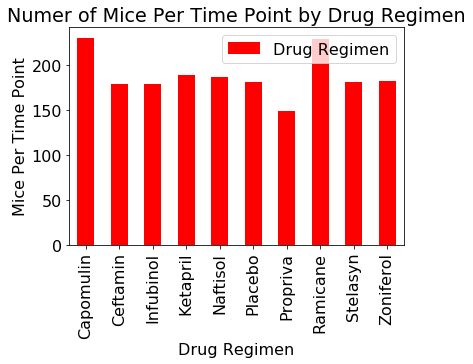

In [129]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

# First create a dataframe grouping by the 'Drug Regimen' column
drug_regimen = clean_mice_df.groupby('Drug Regimen')

# Create a dataframe counting the number of data points for each Drug Regimen
drug_regimen_count = pd.DataFrame(drug_regimen['Drug Regimen'].count())

drug_regimen_chart = drug_regimen_count.plot(kind='bar', title="Numer of Mice Per Time Point by Drug Regimen", color="red")

drug_regimen_chart.set_xlabel("Drug Regimen")
drug_regimen_chart.set_ylabel("Mice Per Time Point")

#plt.tight_layout()

plt.show()


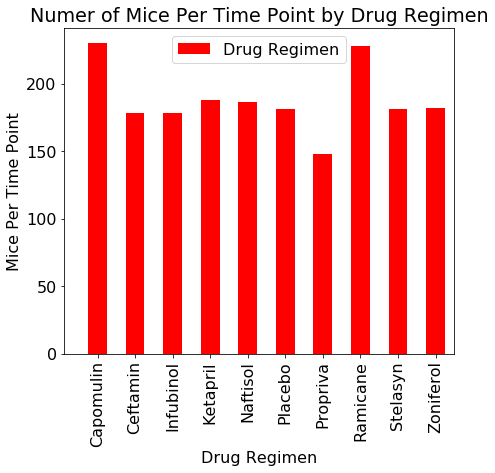

In [111]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

# Set x axis and tick locations
x_axis = np.arange(len(drug_regimen_count))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(7,6))
plt.bar(x_axis, drug_regimen_count["Drug Regimen"], color='red', align="center", width = 0.5)
plt.xticks(tick_locations, list(drug_regimen_count.index), rotation="vertical")

# Set x and y limits
plt.xlim(-0.9, len(x_axis)-0.5)
plt.ylim(0, max(drug_regimen_count["Drug Regimen"])*1.05)

# Set a Title and labels
plt.title("Numer of Mice Per Time Point by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Per Time Point")

column_name = ["Drug Regimen"]
plt.legend(column_name,loc="best")

plt.show()


## Pie Plots

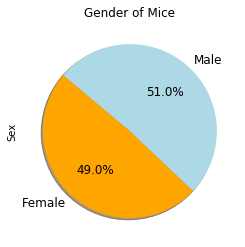

In [71]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# First create a dataframe grouping by the 'Sex' column
mice_gender = clean_mice_df.groupby('Sex')

# Create a dataframe counting the number of data points for each gender
gender_breakdown = pd.DataFrame(mice_gender['Sex'].count())

gender_breakdown.plot(kind='pie', y='Sex', \
                        title="Gender of Mice",startangle=140,\
                        autopct='%1.1f%%',shadow=True, fontsize=12,
                        colors =["orange","lightblue"],legend =False)

# Make the axis equal to avoid plotting an egg shaped pie chart
#plt.axis("equal")

plt.show()


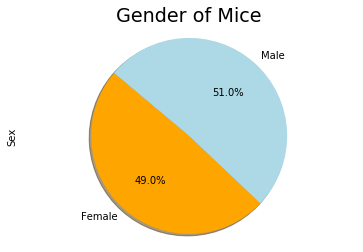

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Get Labels for our pie chart from the index values of the groupby dataframe
genders = list(gender_breakdown.index.values)

# The values of each section of the pie chart
gender_counts = gender_breakdown['Sex']

# The colors of each section of the pie chart
colors = ["orange", "lightblue"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(gender_counts, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.rcParams['font.size'] = 16
plt.title("Gender of Mice")
plt.ylabel("Sex")
plt.axis("equal")
#plt.savefig("figures/PyplotPieChart.png")

plt.show()


## Quartiles, Outliers and Boxplots

In [126]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Determine tumor volume of max(timepoint for mice treated by specific drug
maxtumor_data = clean_mice_df.groupby(["Mouse ID"]).max()
maxtumor_data = maxtumor_data.reset_index()

capomulin = maxtumor_data.loc[maxtumor_data["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
ramicane = maxtumor_data.loc[maxtumor_data["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
infubinol = maxtumor_data.loc[maxtumor_data["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
ceftamin = maxtumor_data.loc[maxtumor_data["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]

#sort values of tumor volume of each drug
capomulin = capomulin.sort_values()
ramicane = ramicane.sort_values()
infubinol = infubinol.sort_values()
ceftamin = ceftamin.sort_values()


In [127]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#quantitavely determine outliers for capomilin
cap_quartiles = capomulin.quantile([0.25,0.5,0.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq - cap_lowerq

cap_lowerbound = cap_lowerq - (1.5*cap_iqr)
cap_upperbound = cap_upperq + (1.5*cap_iqr)

#quantitavely determine outliers for ramicane
ram_quartiles = ramicane.quantile([0.25,0.5,0.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq - ram_lowerq

ram_lowerbound = ram_lowerq - (1.5*ram_iqr)
ram_upperbound = ram_upperq + (1.5*ram_iqr)

#quantitavely determine outliers for infubinol
inf_quartiles = infubinol.quantile([0.25,0.5,0.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq - inf_lowerq

inf_lowerbound = inf_lowerq - (1.5*inf_iqr)
inf_upperbound = inf_upperq + (1.5*inf_iqr)

#quantitavely determine outliers for ceftamin
cef_quartiles = ceftamin.quantile([0.25,0.5,0.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq - cef_lowerq

cef_lowerbound = cef_lowerq - (1.5*cef_iqr)
cef_upperbound = cef_upperq + (1.5*cef_iqr)

print(f'Capomulin quartiles are {cap_lowerq} and {cap_upperq}, IQR is {cap_iqr}, Values below {cap_lowerbound} and above {cap_upperbound} could be outliers.')
print(f'Ramicane quartiles are {ram_lowerq} and {ram_upperq}, IQR is {ram_iqr}, Values below {ram_lowerbound} and above {ram_upperbound} could be outliers.')
print(f'Infubinol quartiles are {inf_lowerq} and {inf_upperq}, IQR is {inf_iqr}, Values below {inf_lowerbound} and above {inf_upperbound} could be outliers.')
print(f'Ceftamin quartiles are {cef_lowerq} and {cef_upperq},IQR is {cef_iqr}, Values below {cef_lowerbound} and above {cef_upperbound} could be outliers.')


Capomulin quartiles are 45.0 and 46.74900552, IQR is 1.7490055199999972, Values below 42.376491720000004 and above 49.37251379999999 could be outliers.
Ramicane quartiles are 45.0 and 46.34383237, IQR is 1.3438323700000012, Values below 42.984251445 and above 48.359580925 could be outliers.
Infubinol quartiles are 54.04860769 and 65.52574285, IQR is 11.477135160000003, Values below 36.83290494999999 and above 82.74144559000001 could be outliers.
Ceftamin quartiles are 48.72207785 and 64.29983003,IQR is 15.577752179999997, Values below 25.355449580000002 and above 87.66645829999999 could be outliers.


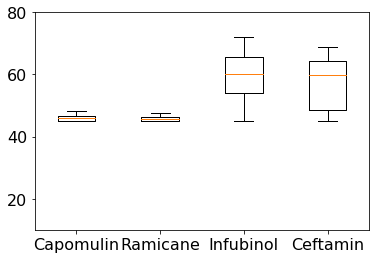

In [128]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#plt.boxplot [capomilin,ramicane,infubinol,ceftamin]
promising_drugs = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
final_four = maxtumor_data.reset_index()
tumor_lists = final_four.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_df = pd.DataFrame(tumor_lists)
tumor_df = tumor_df.reindex(promising_drugs)
tumor_final_vol = [vol for vol in tumor_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_final_vol, labels=promising_drugs)
plt.ylim(10, 80)

plt.show()


## Line and Scatter Plots

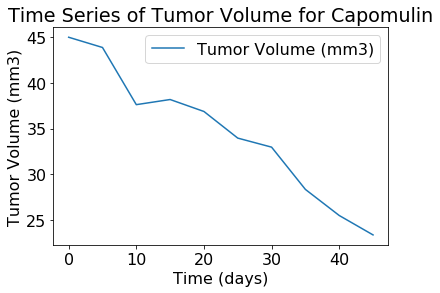

In [124]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = clean_mice_df.loc[(clean_mice_df['Drug Regimen'] == 'Capomulin')]
cap_mouse_zero = capomulin_df['Mouse ID'].unique()
cap_mouse_zero_df = clean_mice_df.loc[(clean_mice_df['Mouse ID'] == cap_mouse_zero[0])]
cap_mouse_clean = cap_mouse_zero_df[['Timepoint', 'Tumor Volume (mm3)']]
cap_mouse_clean.plot.line('Timepoint', 'Tumor Volume (mm3)')

# Create a title, x label, and y label for plot
plt.title("Time Series of Tumor Volume for Capomulin")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()


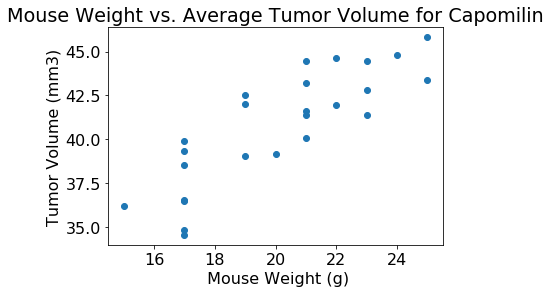

In [103]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

cap_mouse_clean = capomulin_df.groupby(["Mouse ID"]).mean()

x_values = cap_mouse_clean["Weight (g)"]
y_values = cap_mouse_clean["Tumor Volume (mm3)"]

plt.scatter(x_values,y_values)

# Create a title, x label, and y label for graph
plt.xlabel(" Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomilin")

plt.show()


## Correlation and Regression

The correlation  coefficient for mouse weight and average tumor volume for the Capomulin regimen is 0.84


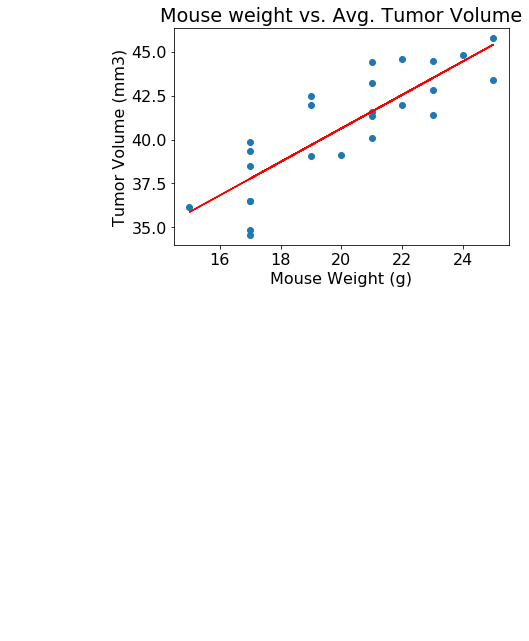

In [118]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(cap_mouse_clean["Weight (g)"],cap_mouse_clean["Tumor Volume (mm3)"])
print(f'The correlation  coefficient for mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}')

# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(9,12),fontsize=12,color="red")

# Create a title, x label, and y label for graph
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse weight vs. Avg. Tumor Volume")

plt.show()
